In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.genfromtxt("../data/train.csv", delimiter=",", skip_header=1, dtype=int)
answers = data[:,0]
images = data[:,1:]/255

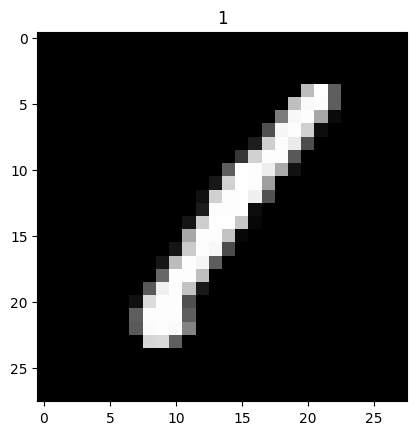

In [5]:
def plot_image(i):
    plt.imshow(images[i,:].reshape(28,28), cmap="gray")
    plt.title(answers[i])
    plt.show()
plot_image(0)

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def one_hot_vector(i):
    return np.eye(10, dtype=int)[i]

def classify(image, weights, biases):
    """Classifies an image from 0 to 9"""
    a0 = image
    a1 = sigmoid(weights[1]@a0+biases[1])
    a2 = sigmoid(weights[2]@a1+biases[2])
    a3 = sigmoid(weights[3]@a2+biases[3])
    return np.argmax(a3)

def grad(image, expected, weights, biases):
    """Computes the gradient of the cost function wrt one image"""
    y = one_hot_vector(expected)
    
    a = [image]
    z = [None]
    for i in range(3):
        z.append(weights[i+1]@a[i]+biases[i+1])
        a.append(sigmoid(z[-1]))
    
    d_weights = [None]*4
    d_biases = [None]*4
    dC_da = [None]*4
    dC_da[3] = 2*(a[3]-y)

    for i in reversed(range(1,4)):
        if i != 3:
            dC_da[i] = np.sum(weights[i+1].T*(d_sigmoid(z[i+1])*dC_da[i+1]), axis=1)
        d_biases[i] = d_sigmoid(z[i])*dC_da[i]
        d_weights[i] = (a[i-1][:,np.newaxis]*d_biases[i]).T
    
    return d_weights, d_biases

def add_grad(weights, biases, d_weights, d_biases, multi=1):
    for i in range(1,4):
        weights[i] += multi*d_weights[i]
        biases[i] += multi*d_biases[i]
    return weights, biases
        
def compute_average_grad(images, expected, weights, biases):
    d_weights = [None,
                np.zeros_like(weights[1]),
                np.zeros_like(weights[2]),
                np.zeros_like(weights[3])
                ]
    d_biases = [None,
               np.zeros_like(biases[1]),
               np.zeros_like(biases[2]),
               np.zeros_like(biases[3])
               ]
    for image, ans in zip(images, expected):
        dw, db = grad(image, ans, weights, biases)
        d_weights, d_biases = add_grad(d_weights, d_biases, dw, db)
    for i in range(1,4):
        d_weights[i] /= len(images)
        d_biases[i] /= len(images)
    return d_weights, d_biases

In [11]:
def random(shape):
    return np.random.randn(*shape)

weights = [
    None,
    random((16,784)),
    random((16,16)),
    random((10,16))
]
biases = [
    None,
    random((16,)),
    random((16,)),
    random((10,))
]

In [12]:
%%time
n, mini_batch_size = 21_000, 1
shuffled_data = np.arange(n).reshape(n//mini_batch_size, mini_batch_size)
np.random.shuffle(shuffled_data)
for choice in shuffled_data:
    for i in range(1):
        dw, db = compute_average_grad(images[choice], answers[choice], weights, biases)
        weights, biases = add_grad(weights, biases, dw, db, -.1)

CPU times: total: 2.83 s
Wall time: 2.91 s


In [13]:
count = 0
for i in range(21000, 42000):
    if classify(images[i], weights, biases) == answers[i]:
        count += 1
count/21000

0.827

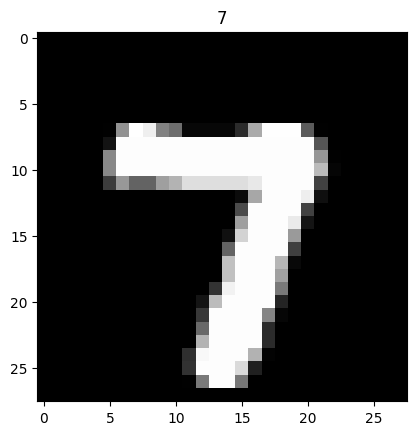

In [14]:
plot_image(22000)

In [15]:
classify(images[22000], weights, biases)

np.int64(7)